<a href="https://colab.research.google.com/github/JulioFMDB/portfolio/blob/main/Projetos_de_Machine_leanrning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Por Júlio Felipe Monteiro De Bem De Bem**

**[My LinkedIn](https://www.linkedin.com/in/juliodebem/)**

**[My GitHub](https://github.com/JulioFMDB)**

**[My personal Instagram](https://www.instagram.com/juliodebem)**


In [45]:
!rm -rf ml-datasets/
!git clone https://github.com/billy-ds/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


# Rotatividade de clientes

**Projeto de teste de ML e análise de BI em base de dados de um serviço de streaming**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
url = '/content/datasets/rotatividade_de_clientes.csv'

In [48]:
df = pd.read_csv(url)

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
# value counts no churn, refazer a base com calma e usando o cerebro
# teste de hipoteses sobre os contratos mensais / anuais
# Fazer uma modelagem do tipo volting (capitulo 7, pt pag 185 voltingClassifier)

In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [52]:
1142 / 7043 # nunca me arrependi tanto de um describe

0.1621468124378816

In [53]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#1. Checando as features de possíveis outliers, nulos etc.

In [55]:
df['MonthlyCharges'].describe() #monthly ok pois ja conheco a base e sabia q estava 100% ok

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [56]:
df['Contract'].describe() # 100% ok com 3 sentencas

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

In [57]:
df['TotalCharges'].describe() # 7043 linhas, 6531 items. Faltando bastante coisa, tratar

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

---

**a) Tratando a TotalCharges**

---



In [58]:
df['TotalCharges'].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [59]:
df['TotalCharges'].iloc[5218]

' '

In [60]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)
condicao = df['TotalCharges'] <= .1 
df[condicao].index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
df['TotalCharges'].sort_values()

3826       0.00
5218       0.00
4380       0.00
753        0.00
488        0.00
         ...   
2187    8564.75
5347    8594.40
6768    8670.10
4586    8672.45
4610    8684.80
Name: TotalCharges, Length: 7043, dtype: float64



---
#2) Primeiro Dataframe: 

 - Depois de tratar a TotalCharges, pensei que poderia localizar os clientes com grandes TotalCharges que NÃO queriam renovar.
 - Então resolvi separar em uma tabela para uma possível política de restauração do cliente com descontos/facilidades.**


---



In [62]:
features_campanha = ['customerID', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn' ]
df_campanha = df[features_campanha]

In [63]:
df_campanha.set_index('customerID', inplace=True)

In [64]:
df_campanha.head()

,Contract,MonthlyCharges,TotalCharges,Churn
customerID,,,,
7590-VHVEG,Month-to-month,29.85,29.85,No
5575-GNVDE,One year,56.95,1889.50,No
3668-QPYBK,Month-to-month,53.85,108.15,Yes
7795-CFOCW,One year,42.30,1840.75,No
9237-HQITU,Month-to-month,70.70,151.65,Yes


In [65]:
df_campanha['Churn']

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

#3) DataFrame de clientes costumazes.
 **Feito o df, agora optei por decidir um valor mínimo de TotalCharges para definir um cliente costumaz.**
 - Para isso, escolhi a média de totalcharges e defini este valor como minimo(2279).
 - Depois de concluído o DF, exportei pra CSV

In [66]:
df_campanha['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [67]:
cond01 = (df_campanha['TotalCharges'] >= 2279.00) & (df_campanha['Churn'] == 'Yes')
df_campanha2_final = df_campanha[cond01]

In [68]:
df_campanha2_final

,Contract,MonthlyCharges,TotalCharges,Churn
customerID,,,,
7892-POOKP,Month-to-month,104.80,3046.05,Yes
0280-XJGEX,Month-to-month,103.70,5036.30,Yes
6467-CHFZW,Month-to-month,99.35,4749.15,Yes
5380-WJKOV,Month-to-month,106.35,3549.25,Yes
4598-XLKNJ,Month-to-month,98.50,2514.50,Yes
...,...,...,...,...
3976-BWUCK,Month-to-month,94.10,2804.45,Yes
6583-QGCSI,Month-to-month,88.05,4367.35,Yes
4174-LPGTI,One year,66.50,2728.60,Yes


In [69]:
df_campanha2_final.to_csv("Campanha_a_ser_feita.csv")

In [70]:
df_campanha.to_csv("fazer_graficos.csv")

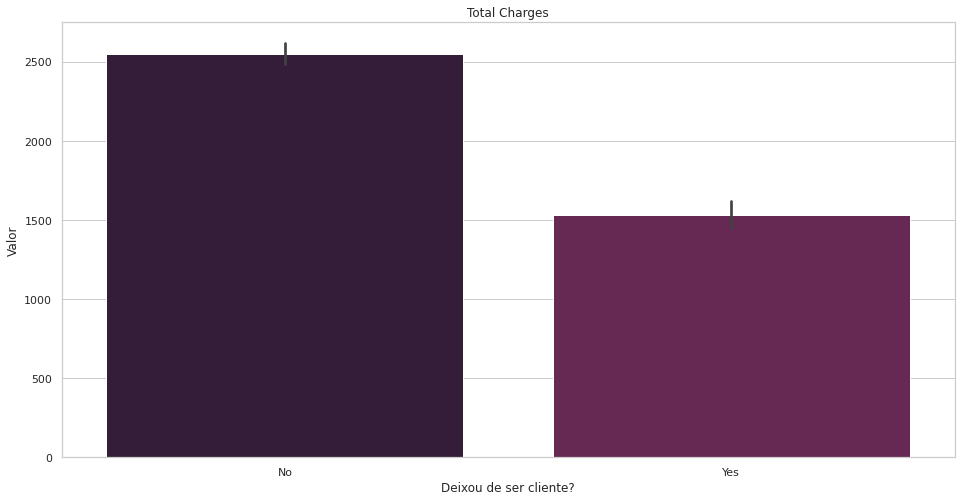

In [71]:
plt.figure(figsize=(16,8))

sns.barplot(data=df_campanha, x='Churn', y='TotalCharges')
sns.set_theme(style='whitegrid', palette='rocket')
plt.title('Total Charges')
plt.xlabel('Deixou de ser cliente?')
plt.ylabel('Valor')
plt.show()

# 4) Criação do DF para depois fazer ML
- Primeiro optei por remover do DF de ML todos os usuários que se encontram no DF de campanha final.
- Para isso, setarei o index do df principal por userID
- Depois optei por remover os UserId's do dataframe de ML, usando os UserID's de campanha final, para reduzir meu escopo de análise, pois **quero que a análise fique centrada em clientes relativamente novos.** 


In [72]:
df_campanha

,Contract,MonthlyCharges,TotalCharges,Churn
customerID,,,,
7590-VHVEG,Month-to-month,29.85,29.85,No
5575-GNVDE,One year,56.95,1889.50,No
3668-QPYBK,Month-to-month,53.85,108.15,Yes
7795-CFOCW,One year,42.30,1840.75,No
9237-HQITU,Month-to-month,70.70,151.65,Yes
...,...,...,...,...
6840-RESVB,One year,84.80,1990.50,No
2234-XADUH,One year,103.20,7362.90,No
4801-JZAZL,Month-to-month,29.60,346.45,No


In [73]:
df_user = df.set_index('customerID')
df_user.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df_teste = pd.DataFrame(df)

In [75]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
df_campanha = df_campanha.reset_index()
df_campanha.head()

,customerID,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Month-to-month,29.85,29.85,No
1,5575-GNVDE,One year,56.95,1889.50,No
2,3668-QPYBK,Month-to-month,53.85,108.15,Yes
3,7795-CFOCW,One year,42.30,1840.75,No
4,9237-HQITU,Month-to-month,70.70,151.65,Yes


In [77]:
cond02 = (df_campanha['TotalCharges'] < 1279.00)
df_ml = df_campanha[cond02]

In [78]:
df_ml = df_ml.set_index('customerID')

In [79]:
df_ml.head()

,Contract,MonthlyCharges,TotalCharges,Churn
customerID,,,,
7590-VHVEG,Month-to-month,29.85,29.85,No
3668-QPYBK,Month-to-month,53.85,108.15,Yes
9237-HQITU,Month-to-month,70.70,151.65,Yes
9305-CDSKC,Month-to-month,99.65,820.50,Yes
6713-OKOMC,Month-to-month,29.75,301.90,No


In [80]:
df_y = df_ml['Churn']

In [81]:
df_y.head()

customerID
7590-VHVEG     No
3668-QPYBK    Yes
9237-HQITU    Yes
9305-CDSKC    Yes
6713-OKOMC     No
Name: Churn, dtype: object

In [82]:
df_y.unique()

array(['No', 'Yes'], dtype=object)

In [83]:
df_features = df_ml[['Contract', 'MonthlyCharges', 'TotalCharges']]

In [84]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3348 entries, 7590-VHVEG to 8361-LTMKD
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Contract        3348 non-null   object 
 1   MonthlyCharges  3348 non-null   float64
 2   TotalCharges    3348 non-null   float64
dtypes: float64(2), object(1)
memory usage: 104.6+ KB


In [85]:
#df_features['Partner'] = df_features['Partner'].map({'Yes': 0, 'No': 1})
#df_features['Dependents'] = df_features['Dependents'].map({'Yes': 0, 'No': 1})
df_features['Contract'] = df_features['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# A base está devidamente limpa...
- E os dataframes para machine learning estão feitos


1.   **df_campanha_final** : Dataframe com todos 'Churn' com yes e gastos acima da média aritimética de gastos 
2.   **df_campanha** : Dataframe com todos 'Churn'da base, seja yes ou no, acima da média aritimética de gastos
3.  **df** : Dataframe original e não limpo



# Árvore de decisão // Dicision tree

In [86]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [87]:
X = df_features

y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123) 

In [88]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (2511, 3)
Tamanho de X_test:  (837, 3)
Tamanho de y_train:  (2511,)
Tamanho de y_test:  (837,)


In [89]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train) #treino com fatos

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=123)

In [90]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 4)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 4)}")

Acurácia de Treino: 0.7834

 ---------------------------

Acurácia de Teste: 0.7527


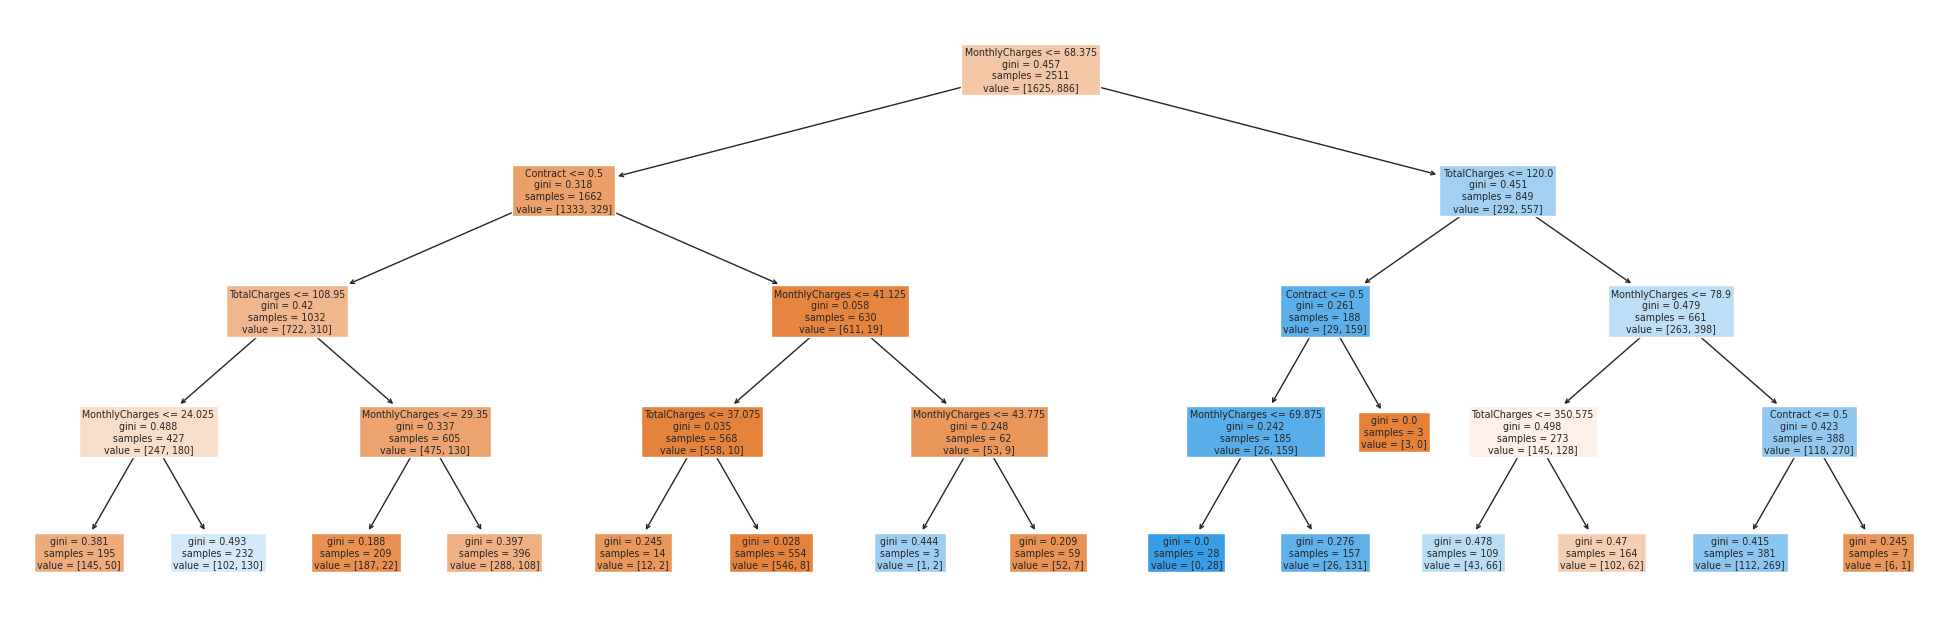

In [91]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(25,8))
plot_tree(
    clf
    , filled=True
    , feature_names={0:'Contract', 1:'MonthlyCharges', 2:'TotalCharges'}
)
plt.show()

# Floresta Aleatória (*Random Forest*)
Agora partiremos ao Machine Learning e analisaremos a arv diferentes dataframes

In [92]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [93]:
X = df_features

y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123) 

In [94]:
print('shape X_train: {0}'.format(X_train.shape))
print('shape y_train: {0}'.format(y_train.shape))
print('shape X_test: {0}'.format(X_test.shape))
print('shape y_test: {0}'.format(y_test.shape))

shape X_train: (2511, 3)
shape y_train: (2511,)
shape X_test: (837, 3)
shape y_test: (837,)


In [95]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=400,
                             max_depth=3,
                             random_state=123,
                             n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=400, n_jobs=-1,
                       random_state=123)

In [96]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.77

 ---------------------------

Acurácia de Teste: 0.75


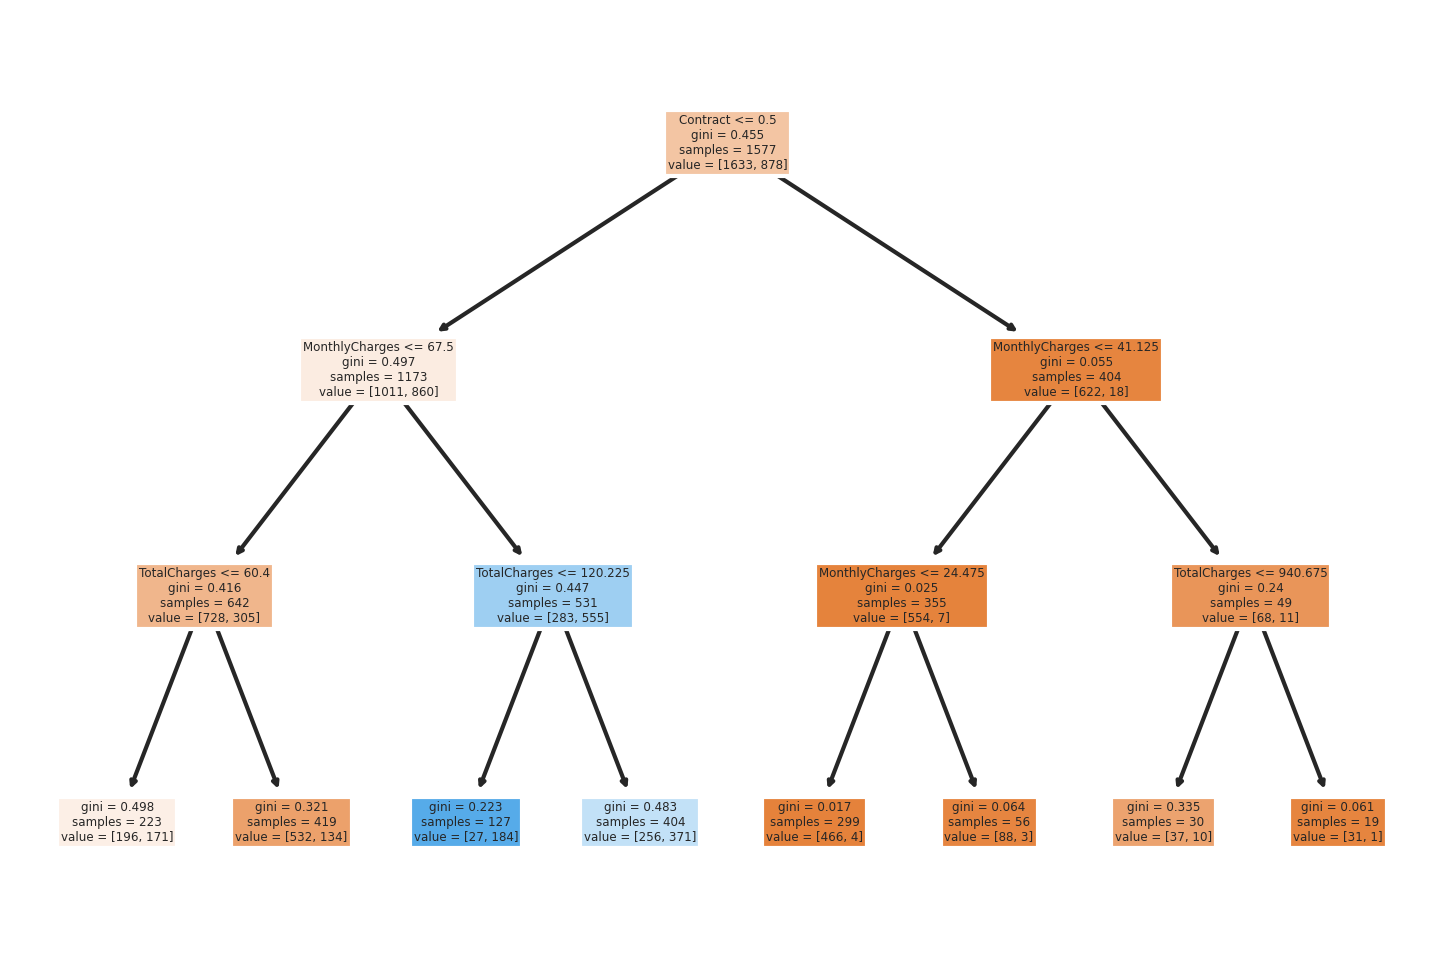

In [97]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(
    clf.estimators_[299]
    , filled=True
    , feature_names={0:'Contract',	1:'MonthlyCharges', 2:'TotalCharges'}
)
plt.show()

# Support Vector Machine
Regressão Linear


In [98]:
# Standarizacao
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=10, random_state=123)
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=123)

In [100]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.75

 ---------------------------

Acurácia de Teste: 0.74
